In [79]:
import requests
import numpy as np
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import cv2

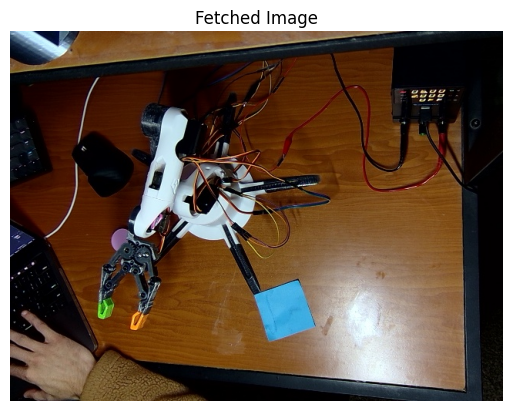

Shape of the image: (480, 640, 3)


In [103]:
result = requests.get('http://100.69.34.11:5000/pic_feed')

image_array = np.array(Image.open(BytesIO(result.content)))

plt.imshow(image_array)
plt.axis('off')  # Turn off axis labels
plt.title("Fetched Image")  # Add a title (optional)
plt.show()
print("Shape of the image:", image_array.shape)

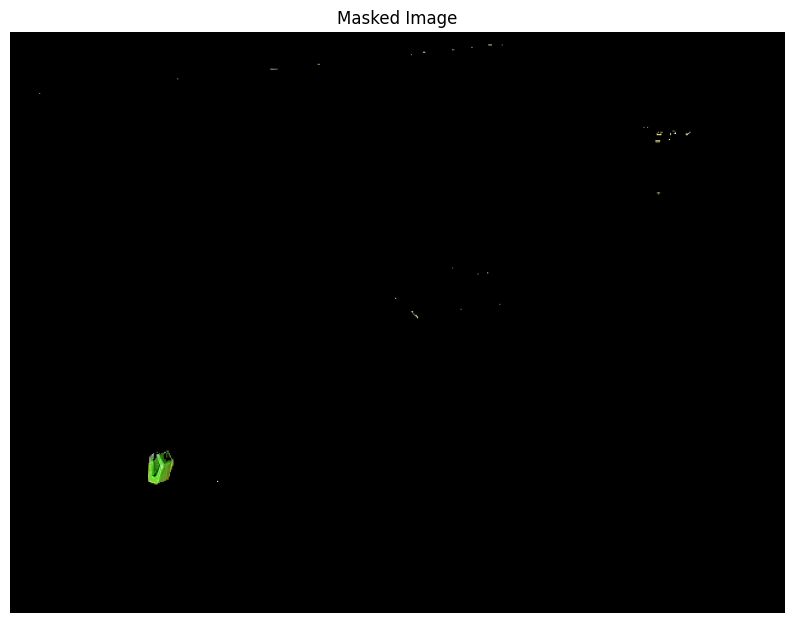

In [119]:
image_bgr = cv2.cvtColor(image_array, cv2.COLOR_RGB2BGR)

hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)

lower_hsv = np.array([25, 50, 90])
upper_hsv = np.array([75, 255, 255])

mask = cv2.inRange(hsv, lower_hsv, upper_hsv)

result = cv2.bitwise_and(image_bgr, image_bgr, mask=mask)

result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(result_rgb)
plt.axis('off')
plt.title("Masked Image")
plt.show()

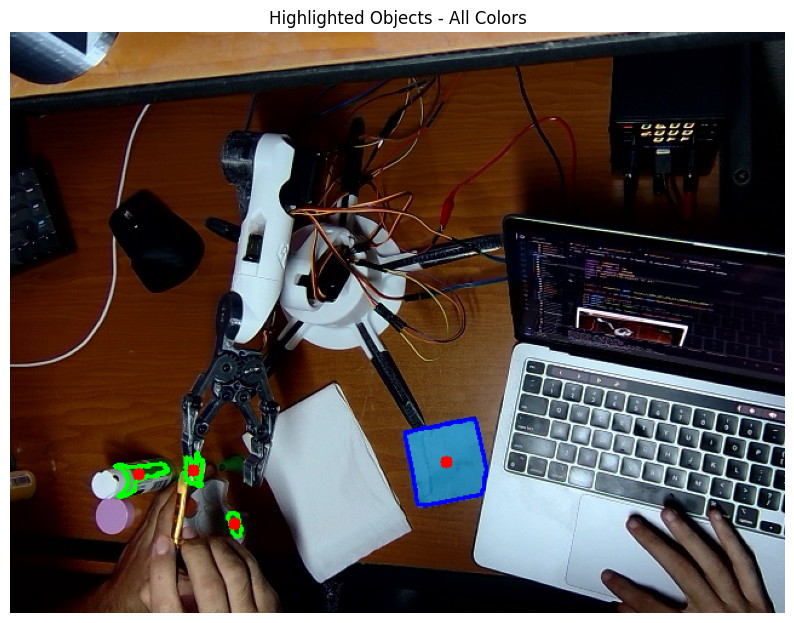

In [81]:
image_bgr = cv2.cvtColor(image_array, cv2.COLOR_RGB2BGR)
hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)

lower_hsv_green = np.array([50, 50, 50])
upper_hsv_green = np.array([75, 255, 255])

lower_hsv_pink = np.array([120, 50, 190])
upper_hsv_pink = np.array([160, 90, 240])

lower_hsv_blue = np.array([90, 130, 128])
upper_hsv_blue = np.array([120, 255, 255])

mask_green = cv2.inRange(hsv, lower_hsv_green, upper_hsv_green)
mask_pink = cv2.inRange(hsv, lower_hsv_pink, upper_hsv_pink)
mask_blue = cv2.inRange(hsv, lower_hsv_blue, upper_hsv_blue)

combined_mask = cv2.bitwise_or(
    mask_green, cv2.bitwise_or(mask_pink, mask_blue))

result = cv2.bitwise_and(image_bgr, image_bgr, mask=combined_mask)


def highlight_contours(frame, mask, color, dot_color=(0, 0, 255)):
    contours, _ = cv2.findContours(
        mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        area = cv2.contourArea(contour)
        if area > 50:
            cv2.drawContours(frame, [contour], -1, color, 2)
            M = cv2.moments(contour)
            if M["m00"] != 0:
                center_x = int(M["m10"] / M["m00"])
                center_y = int(M["m01"] / M["m00"])
                cv2.circle(frame, (center_x, center_y), 5, dot_color, -1)


highlight_contours(image_bgr, mask_green, (0, 255, 0))  # Green
highlight_contours(image_bgr, mask_pink, (255, 0, 255))  # Pink
highlight_contours(image_bgr, mask_blue, (255, 0, 0))  # Blue

result_with_boxes = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(result_with_boxes)
plt.axis('off')
plt.title("Highlighted Objects - All Colors")
plt.show()